In [1]:
#loading in the usual suspects
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from slider_functions import *



In [2]:
#setting up the data...this is where you should load in the data
D=5.88 #distance in pc
#load in data (wl [um]   Flux [W/m2/m--MKS]   err [W/m2/m--MKS])
file='Gl570D.txt'
wl_data, F_data, err_data=np.loadtxt(file).T #make sure data R is < 250

#modifying data (e.g., trimming bad data, or down sampling,etc)
wl_data=wl_data[::3][0:-30]
F_data=F_data[::3][0:-30]
err_data=err_data[::3][0:-30]

<IPython.core.display.Javascript object>


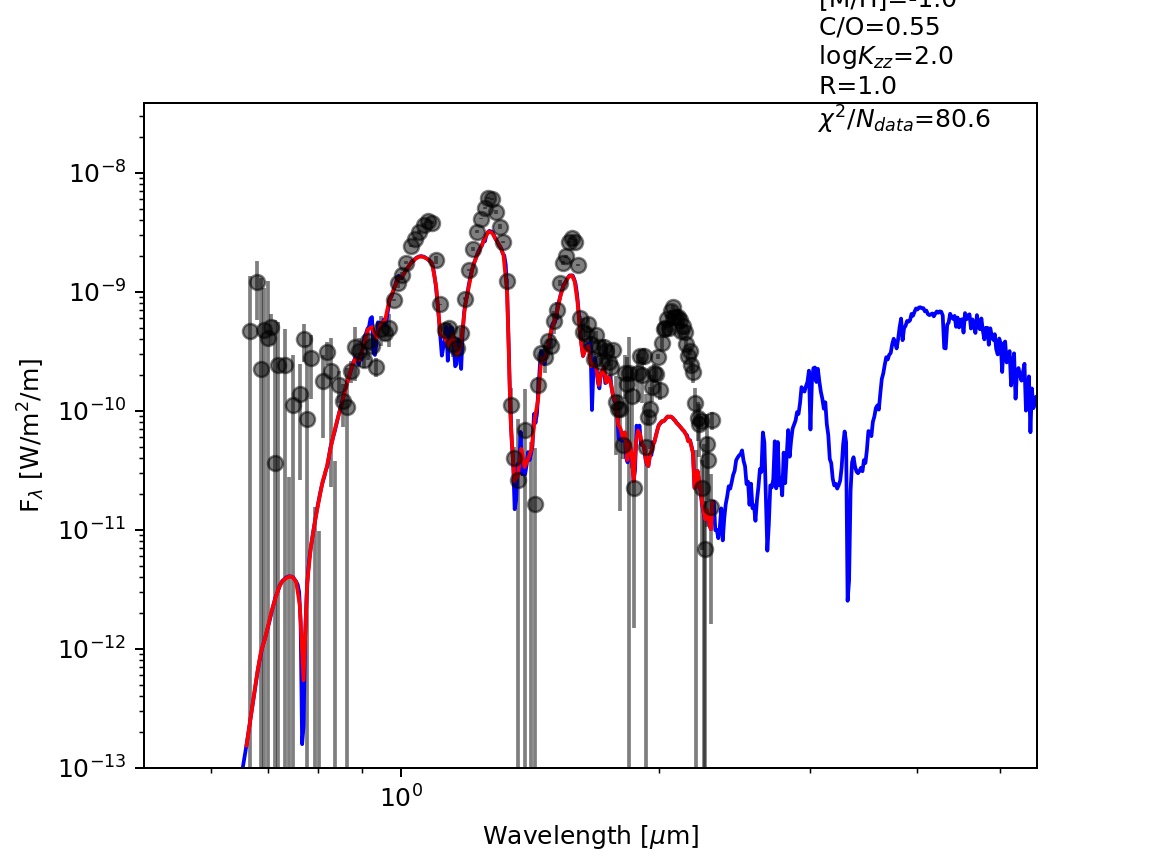

interactive(children=(IntSlider(value=700, description='Teff', max=1600, min=500, step=50), FloatSlider(value=4.25, description='logg', max=5.25, min=3.5, step=0.25), FloatSlider(value=-0.75, description='Met', max=1.0, min=-2.5, step=0.25), FloatSlider(value=0.5, description='CtoO', max=0.9, min=0.1, step=0.2), IntSlider(value=2, description='logKzz', max=10, min=-1, step=3), FloatSlider(value=1.0, description='R', max=1.25, min=0.75, step=0.05), FloatSlider(value=-0.2, description='logwl_low', max=2.1, min=-1.0), FloatSlider(value=0.5, description='logdwl', max=2.1), FloatSlider(value=1.0, description='plt_yscale', max=10.0), Checkbox(value=False, description='ylog'), Checkbox(value=False, description='xlog'), Output()), _dom_classes=('widget-interact',))

In [45]:
#setting up plots
x=1
#wavelength range
#wl_low=0.8
#wl_high=15.0
fig, ax2=plt.subplots()
def widget_plot(Teff, logg, Met, CtoO, logKzz, R, logwl_low, logdwl,plt_yscale, ylog,xlog):
    model, params=load_model(Teff, logg, Met, CtoO, logKzz)
    wl, F=model
    Fbinned=instrument_non_uniform_tophat(wl_data, 1E4/wl, F)
    #TP.set_xdata(T)
    sf=(R/D)**2*(71492.*1.E3/3.08E16)**2
    F=F*sf
    #spectrum
    ax2.cla()
    y_max=F_data.max()*1.2*plt_yscale
    print(wl_low)
    ax2.axis([10**logwl_low,10**logwl_low+10**(logdwl),1E-13, y_max])
    ax2.errorbar(wl_data,F_data,yerr=err_data,xerr=None,fmt='ok',alpha=0.5)
    ax2.plot(wl, F,color='blue')
    ax2.plot(wl_data, Fbinned*sf,color='red')
    chi2_N=np.sum((Fbinned*sf-F_data)**2/err_data**2)/len(F_data)
    ax2.set_xlabel('Wavelength [$\mu$m]')
    ax2.set_ylabel('F$_{\lambda}$ [W/m$^2$/m]')
    if ylog: ax2.semilogy()
    if xlog: ax2.semilogx()

    Teff, logZ, logg, CtoO, logKzz=params
    posneg=''
    if Met >=0.0: posneg='+'
    ax2.text(ax2.get_xlim()[0]+0.5*(ax2.get_xlim()[1]-ax2.get_xlim()[0]), ax2.get_ylim()[1]*0.6, 'T$_{eff}=$'+str(round(float(Teff),1))+'\n log$g$='+str(logg)+'\n [M/H]='+posneg+str(logZ)+'\n C/O='+str(CtoO)+' \n log$K_{zz}$='+str(round(float(logKzz),1))+'\n R='+str(R)+'\n $\chi^2/N_{data}$='+str(round(chi2_N,1)))





    
interact(widget_plot, Teff=widgets.IntSlider(min=500, max=1600, step=50, value=700), logg=(3.5, 5.25, 0.25), Met=(-2.5, 1.0, 0.25), CtoO=(0.1, 0.9, 0.2), logKzz=(-1, 10, 3), R=(0.75, 1.25, 0.05), logwl_low=widgets.FloatSlider(min=-1., max=2.1, step=0.1, value=-0.2), logdwl=widgets.FloatSlider(min=0, max=2.1, step=0.1, value=0.5), plt_yscale=widgets.FloatSlider(min=0, max=10, step=0.1, value=1), xlog=False, ylog=False)
interact()

